In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set(context='talk', style='ticks',
        color_codes=True, rc={'legend.frameon': False})

%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.dpi'] = 300
plt.rcParams["font.family"] = 'Arial'
plt.rcParams.update({'font.size': 24})

import numpy as np
import glob

In [2]:
#new_df = pd.DataFrame(columns = pd.read_csv('test_221003_kfold0/kfold_0.csv').columns + ['std'])

new_df = []

for i in range(0,5):
    #df_test = pd.DataFrame(columns = pd.read_csv('test_221003_kfold0/kfold_0.csv').columns)
    csvs = glob.glob('test_*_kfold' + str(i) + '*/kfold_?.csv')
    df = pd.concat([pd.read_csv(csv)[pd.read_csv(csv)['Train/Valid/Test'] == 'Valid'] for csv in csvs])
    #print(len(df) / len(df.groupby('blends_str_repr')))
    
    for _, sub_df in df.groupby('blends_str_repr'):
        if len(sub_df) != 3:
            print("????????")
            
        #print(list(sub_df.iloc[0])[0:-1])
        new_df.append(list(sub_df.iloc[0])[0:-1] + [sub_df.predicted.mean(), sub_df.predicted.std()])

In [3]:
new_df = pd.DataFrame(new_df, columns = list(pd.read_csv('test_221003_kfold0/kfold_0.csv').columns) + ['std'])

In [4]:
new_df

,No,smi_mol1,smi_mol2,smi_mol3,smi_mol4,smi_mol5,smi_mol6,smi_mol7,smi_mol8,smi_mol9,...,can_smi_12,can_smi_13,blends_str_repr,concat_smiles,num_components,blend_number,fold_num,Train/Valid/Test,predicted,std
0,1120,C1C=CCO1,[HH],[HH],[HH],[HH],[HH],[HH],[HH],[HH],...,[HH],[HH],C1=CCOC1_1.000_,C1=CCOC1,1,219.0,0.0,Valid,19.718396,1.299778
1,703,CCCCCCCCCCCCCCCCCC,CCCCCCCCCCCCCCCCCCCC,CCCCCCCCCCCCCCCC(C)C,CCCCC1CCCCC1,CC(C)C1CC(CC(C1)C(C)C)C(C)C,C1CCC2C(C1)CCC3C2CCCC3,CC(C)C1=CC(=CC(=C1)C(C)C)C(C)C,C1CCC2=CC=CC=C2C1,CC1=CC=CC2=CC=CC=C12,...,[HH],[HH],C1CCC2C(C1)CCC1CCCCC12_0.060_CC(C)C1CC(C(C)C)C...,CCCCCCCCCCCCCCCCCC.CCCCCCCCCCCCCCCCCCCC.CCCCCC...,9,46.0,0.0,Valid,47.506433,2.105575
2,695,CCCCCCCCCCCCCCCC,CC(CC(C)(C)C)CC(C)(C)CC(C)(C)C,C1CCC2CCCCC2C1,CC1=CC=CC2=CC=CC=C12,[HH],[HH],[HH],[HH],[HH],...,[HH],[HH],C1CCC2CCCCC2C1_0.058_CC(CC(C)(C)C)CC(C)(C)CC(C...,CCCCCCCCCCCCCCCC.CC(CC(C)(C)C)CC(C)(C)CC(C)(C)...,4,42.0,0.0,Valid,60.243936,0.545643
3,694,CCCCCCCCCCCCCCCC,CC(CC(C)(C)C)CC(C)(C)CC(C)(C)C,C1CCC2CCCCC2C1,CC1=CC=CC2=CC=CC=C12,[HH],[HH],[HH],[HH],[HH],...,[HH],[HH],C1CCC2CCCCC2C1_0.072_CC(CC(C)(C)C)CC(C)(C)CC(C...,CCCCCCCCCCCCCCCC.CC(CC(C)(C)C)CC(C)(C)CC(C)(C)...,4,42.0,0.0,Valid,55.447178,0.543383
4,692,CCCCCCCCCCCCCCCC,CC(CC(C)(C)C)CC(C)(C)CC(C)(C)C,C1CCC2CCCCC2C1,CC1=CC=CC2=CC=CC=C12,[HH],[HH],[HH],[HH],[HH],...,[HH],[HH],C1CCC2CCCCC2C1_0.072_CC(CC(C)(C)C)CC(C)(C)CC(C...,CCCCCCCCCCCCCCCC.CC(CC(C)(C)C)CC(C)(C)CC(C)(C)...,4,42.0,0.0,Valid,45.671808,0.617689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1246,C1CCC(CC1)CO,[HH],[HH],[HH],[HH],[HH],[HH],[HH],[HH],...,[HH],[HH],OCC1CCCCC1_1.000_,OCC1CCCCC1,1,307.0,4.0,Valid,18.143942,0.533118
1139,1028,C1=CC=C(C=C1)CCO,[HH],[HH],[HH],[HH],[HH],[HH],[HH],[HH],...,[HH],[HH],OCCc1ccccc1_1.000_,OCCc1ccccc1,1,136.0,4.0,Valid,7.203977,0.627735
1140,1211,C1=CC=C(C=C1)COCC2=CC=CC=C2,[HH],[HH],[HH],[HH],[HH],[HH],[HH],[HH],...,[HH],[HH],c1ccc(COCc2ccccc2)cc1_1.000_,c1ccc(COCc2ccccc2)cc1,1,278.0,4.0,Valid,7.991649,1.208387
1141,1220,C1=CC=CC=C1,[HH],[HH],[HH],[HH],[HH],[HH],[HH],[HH],...,[HH],[HH],c1ccccc1_1.000_,c1ccccc1,1,285.0,4.0,Valid,6.828523,0.696158


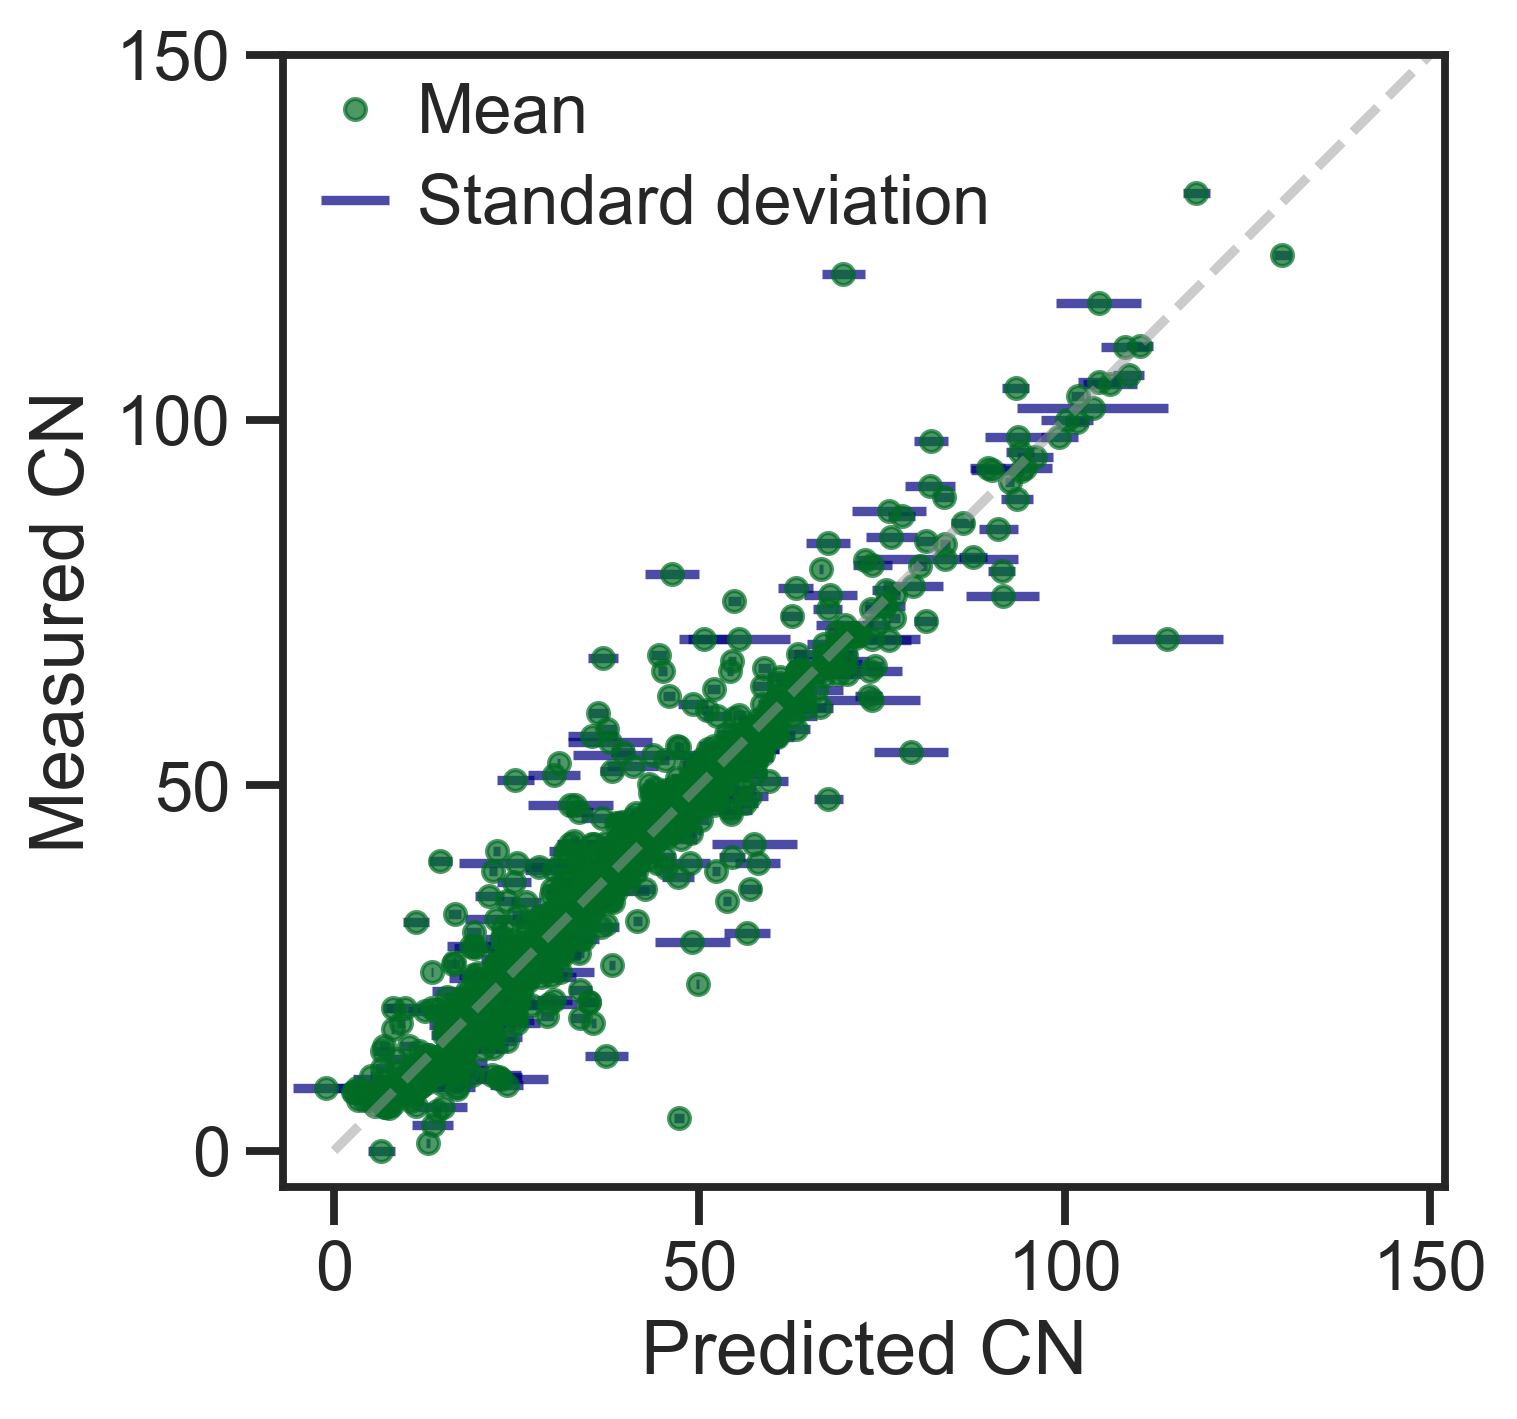

In [5]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.axis('equal')
ax.set_xlim([-5,150])
ax.set_ylim([-5,150])
ax.set_xticks(np.arange(0.0,150.01,50.0))
ax.set_yticks(np.arange(0.0,150.01,50.0))
ax.set_xlabel('Predicted CN')
ax.set_ylabel('Measured CN')

#ax.set_title('10-fold cross validation \n (Validation set from each fold,\n  Sample weight = 0.6)')
ax.plot(new_df['predicted'], new_df['CN'], '.',  ms=10, alpha=.7, color='#016C24', label = 'Mean')
ax.errorbar(new_df['predicted'], new_df['CN'], xerr=new_df['std'], fmt='.',  ms=0, alpha=0.7, color='navy', 
            label = 'Standard deviation', capsize=0)
#ax.legend(loc='center left', bbox_to_anchor=(1, .5))
ax.legend(loc='upper left', handletextpad=-0.1,bbox_to_anchor=(-0.05, 1.03), labelspacing=0.4 )
ax.plot([0,160], [0, 160], '--', color='.6', alpha=.5)

#fig.tight_layout()

In [6]:
new_df['AE'] = np.abs(new_df['predicted'] - new_df['CN'])

In [7]:
df_for_parity = pd.read_csv('test_221003_kfold0/kfold_0.csv')
df_for_parity[df_for_parity['Train/Valid/Test'] == 'Valid']

,No,smi_mol1,smi_mol2,smi_mol3,smi_mol4,smi_mol5,smi_mol6,smi_mol7,smi_mol8,smi_mol9,...,can_smi_11,can_smi_12,can_smi_13,blends_str_repr,concat_smiles,num_components,blend_number,fold_num,Train/Valid/Test,predicted
927,72,CCCCCCCCCCCCCCCCCC(=O)O,[HH],[HH],[HH],[HH],[HH],[HH],[HH],[HH],...,[HH],[HH],[HH],CCCCCCCCCCCCCCCCCC(=O)O_1.000_,CCCCCCCCCCCCCCCCCC(=O)O,1,4.0,0.0,Valid,76.072380
928,75,CCC=CCC=CCC=CCCCCCCCC(=O)O,[HH],[HH],[HH],[HH],[HH],[HH],[HH],[HH],...,[HH],[HH],[HH],CCC=CCC=CCC=CCCCCCCCC(=O)O_1.000_,CCC=CCC=CCC=CCCCCCCCC(=O)O,1,7.0,0.0,Valid,33.939583
929,189,CCCCOC(=O)CCCCC(=O)OCCCC,[HH],[HH],[HH],[HH],[HH],[HH],[HH],[HH],...,[HH],[HH],[HH],CCCCOC(=O)CCCCC(=O)OCCCC_1.000_,CCCCOC(=O)CCCCC(=O)OCCCC,1,10.0,0.0,Valid,27.849081
930,211,CCCCCCCCCC(=O)OC,[HH],[HH],[HH],[HH],[HH],[HH],[HH],[HH],...,[HH],[HH],[HH],CCCCCCCCCC(=O)OC_1.000_,CCCCCCCCCC(=O)OC,1,21.0,0.0,Valid,51.617287
931,213,CCCCCCCCCC(=O)OCCC,[HH],[HH],[HH],[HH],[HH],[HH],[HH],[HH],...,[HH],[HH],[HH],CCCCCCCCCC(=O)OCCC_1.000_,CCCCCCCCCC(=O)OCCC,1,23.0,0.0,Valid,49.712097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,700,CCCCCCCCCCCCCCCC,CC(CC(C)(C)C)CC(C)(C)CC(C)(C)C,C1CCC2CCCCC2C1,CC1=CC=CC2=CC=CC=C12,[HH],[HH],[HH],[HH],[HH],...,[HH],[HH],[HH],C1CCC2CCCCC2C1_0.148_CC(CC(C)(C)C)CC(C)(C)CC(C...,CCCCCCCCCCCCCCCC.CC(CC(C)(C)C)CC(C)(C)CC(C)(C)...,4,42.0,0.0,Valid,44.821720
1139,701,CCCCCCCCCCCCCCCCCC,CC(CC(C)(C)C)CC(C)(C)CC(C)(C)C,CC1=CC(=C(C=C1)C)C,C1CCC2=CC=CC=C2C1,CC1=CC=CC2=CC=CC=C12,[HH],[HH],[HH],[HH],...,[HH],[HH],[HH],CC(CC(C)(C)C)CC(C)(C)CC(C)(C)C_0.270_CCCCCCCCC...,CCCCCCCCCCCCCCCCCC.CC(CC(C)(C)C)CC(C)(C)CC(C)(...,5,45.0,0.0,Valid,43.252125
1140,703,CCCCCCCCCCCCCCCCCC,CCCCCCCCCCCCCCCCCCCC,CCCCCCCCCCCCCCCC(C)C,CCCCC1CCCCC1,CC(C)C1CC(CC(C1)C(C)C)C(C)C,C1CCC2C(C1)CCC3C2CCCC3,CC(C)C1=CC(=CC(=C1)C(C)C)C(C)C,C1CCC2=CC=CC=C2C1,CC1=CC=CC2=CC=CC=C12,...,[HH],[HH],[HH],C1CCC2C(C1)CCC1CCCCC12_0.060_CC(C)C1CC(C(C)C)C...,CCCCCCCCCCCCCCCCCC.CCCCCCCCCCCCCCCCCCCC.CCCCCC...,9,46.0,0.0,Valid,49.937733
1141,860,CCCCCCCCCCCC,CC(CC(C)(C)C)CC(C)(C)CC(C)(C)C,C1CCC2CCCCC2C1,CCCC1=CC=CC=C1,[HH],[HH],[HH],[HH],[HH],...,[HH],[HH],[HH],C1CCC2CCCCC2C1_0.347_CC(CC(C)(C)C)CC(C)(C)CC(C...,CCCCCCCCCCCC.CC(CC(C)(C)C)CC(C)(C)CC(C)(C)C.C1...,4,57.0,0.0,Valid,50.074585


2.15892040806904 3.816065402314815


/Users/kyj/opt/anaconda3/envs/cnpred_new/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/kyj/opt/anaconda3/envs/cnpred_new/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


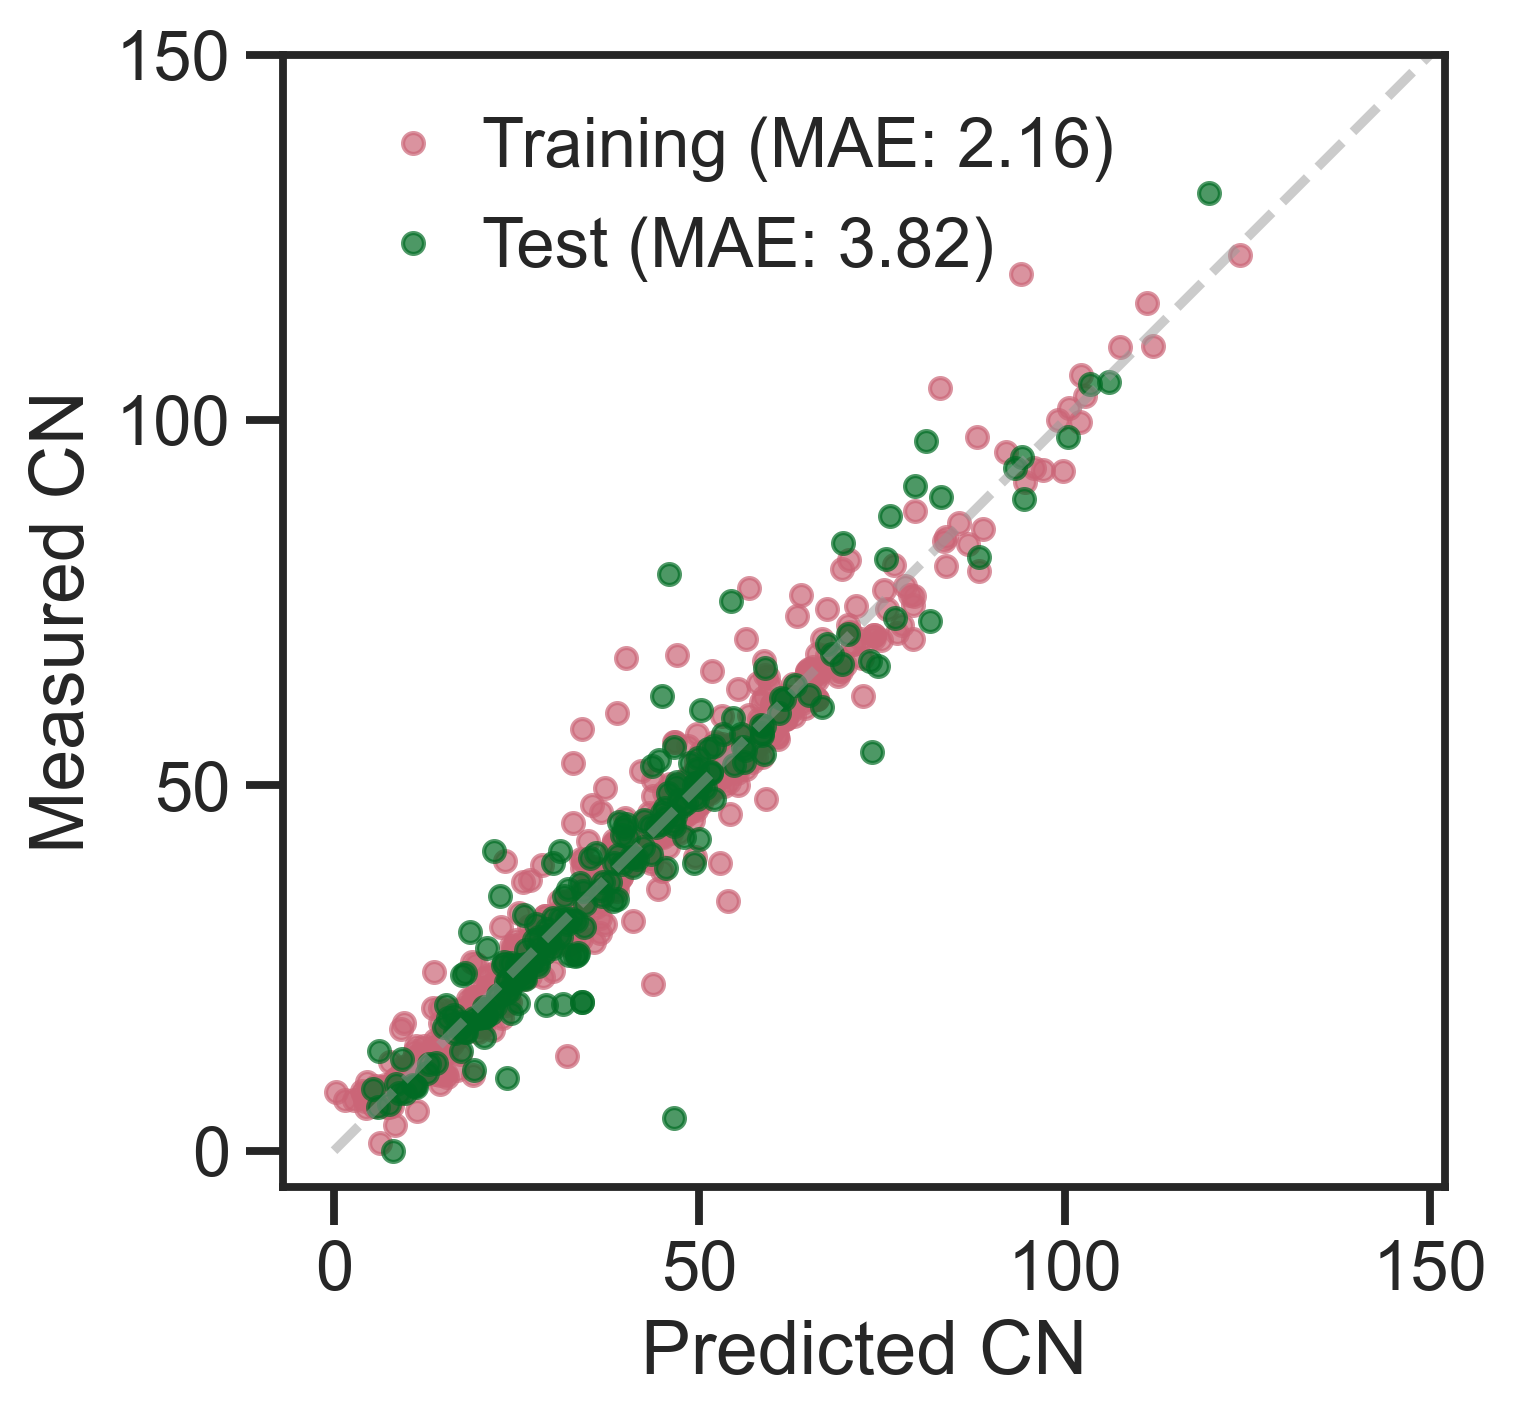

In [8]:
train, test = df_for_parity[df_for_parity['Train/Valid/Test'] == 'Train'], \
              df_for_parity[df_for_parity['Train/Valid/Test'] == 'Valid']

train['AE'] = np.abs(train['predicted'] - train['CN'])
test['AE'] = np.abs(test['predicted'] - test['CN'])
print(train.AE.mean(), test.AE.mean())

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.axis('equal')
ax.set_xlim([-5,150])
ax.set_ylim([-5,150])
ax.set_xticks(np.arange(0.0,150.01,50.0))
ax.set_yticks(np.arange(0.0,150.01,50.0))
ax.set_xlabel('Predicted CN')
ax.set_ylabel('Measured CN')

#ax.set_title('10-fold cross validation \n (Validation set from each fold,\n  Sample weight = 0.6)')
ax.plot(train['predicted'], train['CN'], '.',  ms=10, alpha=0.7, color='#cb6577', label = 'Training (MAE: 2.16)')
ax.plot(test['predicted'], test['CN'], '.',  ms=10, alpha=0.7, color='#016C24', label = 'Test (MAE: 3.82)')



ax.legend(loc='best', handletextpad=0.0)
ax.plot([0,160], [0, 160], '--', color='.6', alpha=.5)



In [9]:
csvs = glob.glob('test_221003_kfold?/kfold_?.csv')
df_test = pd.DataFrame(columns = pd.read_csv(csvs[0]).columns)
for csv in csvs:
    df = pd.read_csv(csv)
    df_test = pd.concat([df_test, df[df['Train/Valid/Test'] == 'Valid']])
df_test['AE'] = np.abs(df_test['predicted'] - df_test['CN'])

Text(0, 0.5, 'Frequency')

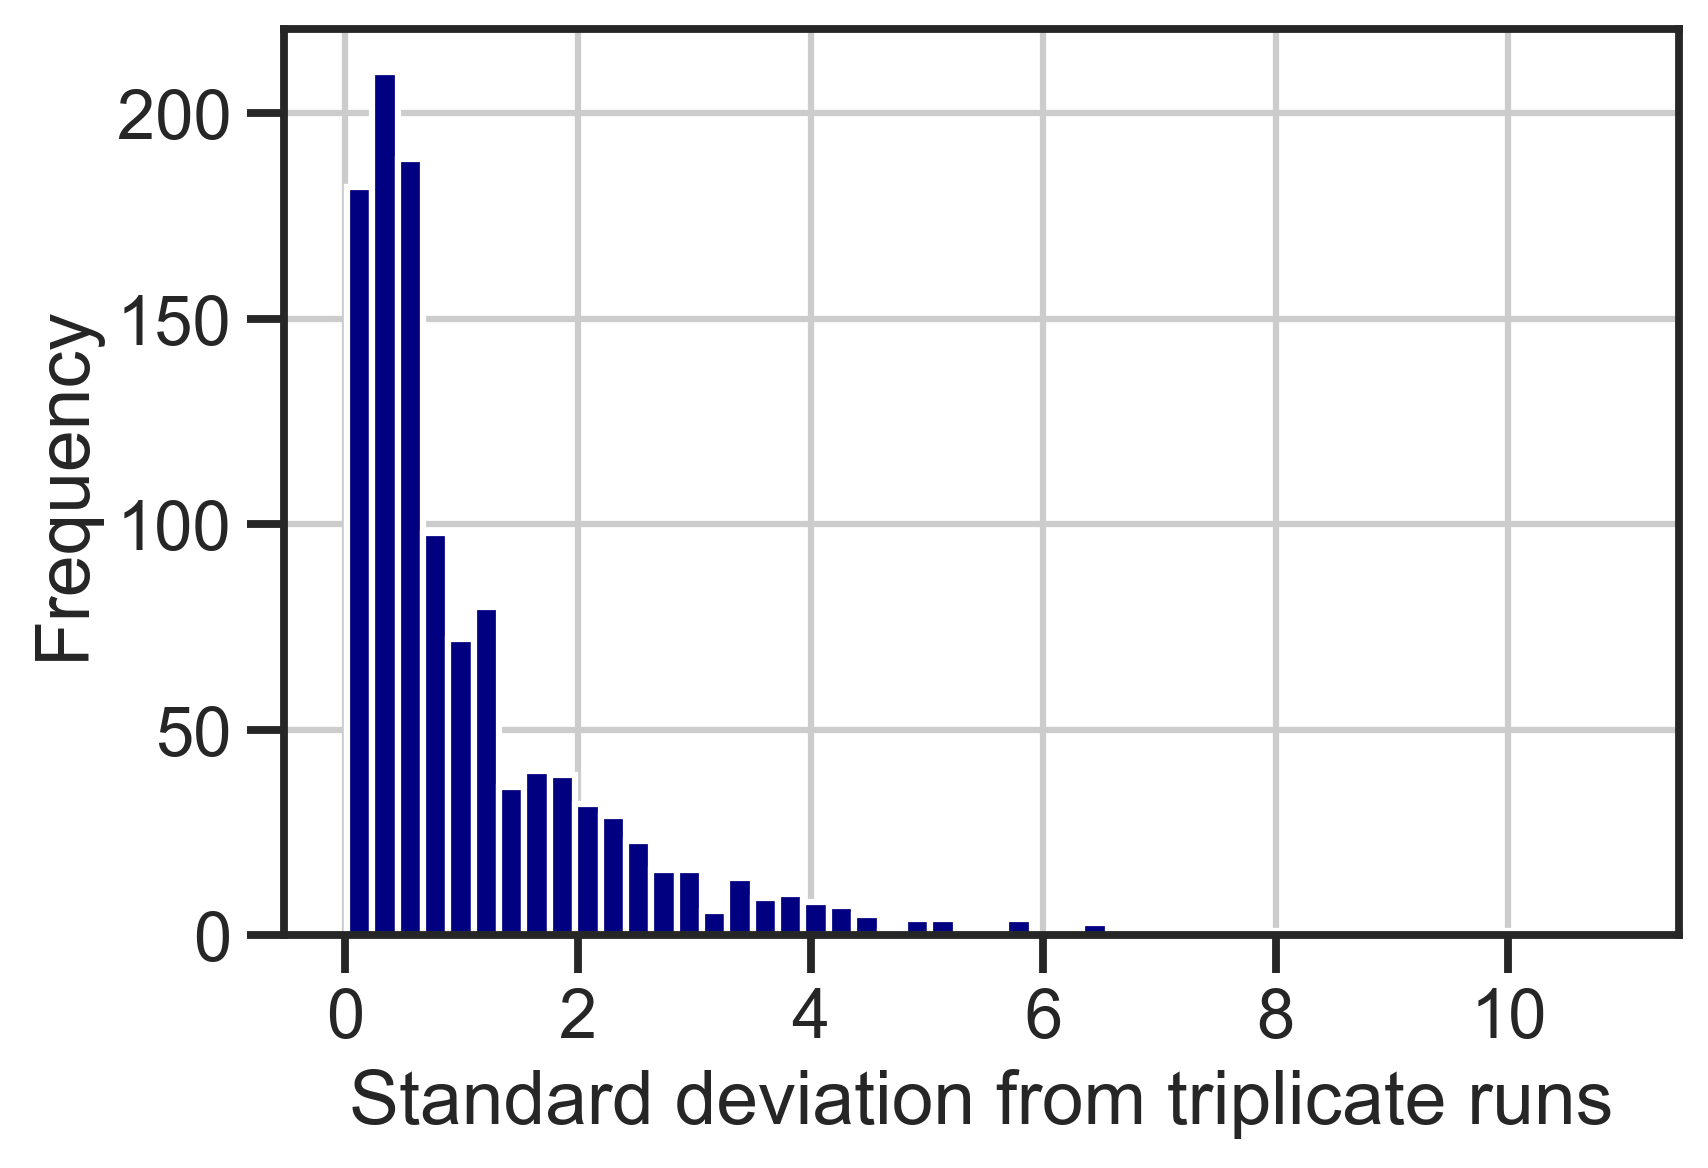

In [10]:
ax = new_df['std'].hist(bins=50, color='navy')
ax.set_xlabel('Standard deviation from triplicate runs')
ax.set_ylabel('Frequency')